# Happiness and Freedom of Movement

## An examination of how happiness correlates to personal and economic freedom.

##### Analysis derived from data using the most recent World Happiness Report and Human Freedom Index.



### Statements to consider

##### General

* Freedom is positively correlated with Happiness.

##### Personal freedom of movement with relation to geographic isolation

* People in land-locked countries are less happy than others considering all other factors.

##### Happiness with relation to religious and gender freedom (personal freedom of movement)

* People in countries with reduced religious freedom and women's moveement are less happy than others.


In [1]:
# imports

import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sqlalchemy as sa

# create sqlite database and path

from sqlalchemy import create_engine
engine = create_engine('sqlite:///Happiness_Freedom.db')

# set seaborn default theme

sns.set(color_codes=True)

# multiple outputs from single cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [7]:
# create dataframe from csv

hfi_file = pd.read_csv("hfi_cc_2018.csv")

whr_file = pd.read_csv("whr_2017.csv")

hfi = pd.DataFrame(hfi_file)

whr = pd.DataFrame(whr_file)

# create database and tables from dataframe (database and table have been previously created using this code)

# hfi.to_sql("Human Freedom Index", con=engine)
# whr.to_sql("World Happiness Report", con=engine)

In [8]:
# of Human Freedom Index dataframe info

hfi.info()
hfi.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Columns: 123 entries, year to hf_quartile
dtypes: float64(119), int64(1), object(3)
memory usage: 1.4+ MB


,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,ALB,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,...,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,10.0,...,3.765515,8.523503,7.029528,5.676956,5.268992,4.99,159.0,5.135886,155.0,4.0
2,2016,AGO,Angola,Sub-Saharan Africa,NaN,NaN,NaN,3.451814,8.060260,5.0,...,1.945540,8.096776,6.782923,4.930271,5.518500,5.17,155.0,5.640662,142.0,4.0


In [10]:
### Happiness is directly correlated with freedom

# get overall freedom score by country from World Freedom Report

hf_score_by_country = hfi[["countries", "hf_score"]]

hf_score_by_country.head(3)

# get overall happiness score by country from Happiness Index

wh_score_by_country = whr[["Country", "Happiness.Score"]]

# set "Country" column to "countries" to merge on conat with freedom index

wh_score_by_country.columns = ["countries", "hp_score"]

wh_score_by_country.head(3)

# coombine the two dataframes

reports_combined = pd.concat([hf_score_by_country, wh_score_by_country], sort=True)

reports_combined.head(3)

reports_grouped = reports_combined.groupby("countries")["hf_score", "hp_score"].mean()

reports_grouped.head(3)

hf_wh_scores = reports_grouped.dropna()

hf_wh_scores.head(3)

,countries,hf_score
0,Albania,7.568140
1,Algeria,5.135886
2,Angola,5.640662


,countries,hp_score
0,Norway,7.537
1,Denmark,7.522
2,Iceland,7.504


,countries,hf_score,hp_score
0,Albania,7.568140,NaN
1,Algeria,5.135886,NaN
2,Angola,5.640662,NaN


,hf_score,hp_score
countries,,
Afghanistan,NaN,3.794
Albania,7.522911,4.644
Algeria,5.140803,5.872


,hf_score,hp_score
countries,,
Albania,7.522911,4.644
Algeria,5.140803,5.872
Angola,5.499577,3.795


<class 'pandas.core.frame.DataFrame'>
Index: 135 entries, Albania to Zimbabwe
Data columns (total 2 columns):
hf_score    135 non-null float64
hp_score    135 non-null float64
dtypes: float64(2)
memory usage: 3.2+ KB


,hf_score,hp_score
countries,,
Albania,7.522911,4.644
Algeria,5.140803,5.872
Angola,5.499577,3.795


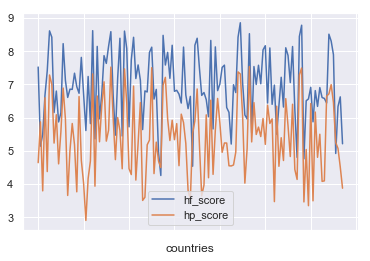

In [11]:
hf_wh_scores.info()
hf_wh_scores.head(3)

hf_wh_scores.plot()

C:\Users\jerem\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Correlation of Happiness and Freedom')

Text(0.5,0,'Happiness')

Text(0,0.5,'Freedom')

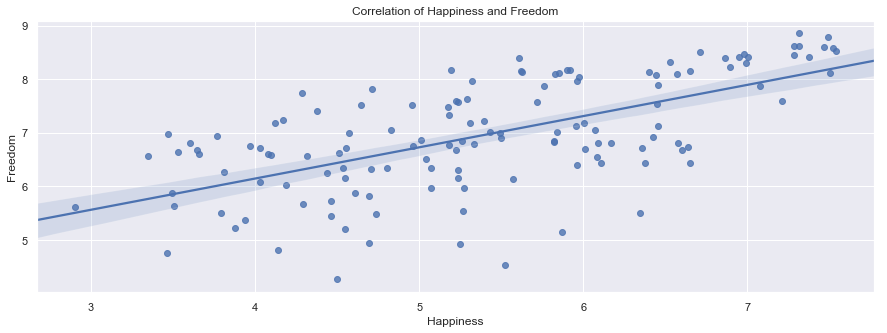

In [16]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.regplot(x="hp_score", y="hf_score", data=hf_wh_scores)
ax.set_title("Correlation of Happiness and Freedom")
ax.set_xlabel("Happiness")
ax.set_ylabel("Freedom")



C:\Users\jerem\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Correlation of General Freedom and Movement Freedom')

Text(0.5,0,'Movement Freedom')

(0, 10)

Text(0,0.5,'General Freedom')

(0, 10)

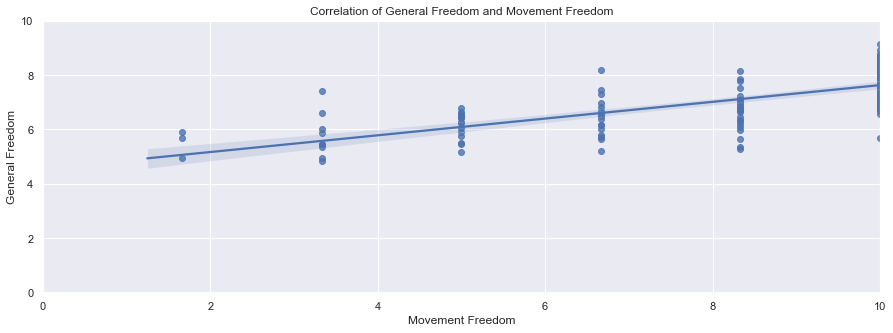

In [91]:
# General Freedom and Freedom of Movement

# retrieve movement and freedom data from Human Freedom Index grouped by country and ordered by freedom score

hfi_movement_and_freedom_data = "SELECT hf_score, pf_movement FROM 'Human Freedom Index' GROUP BY countries ORDER BY pf_score DESC"
hfi_movement_and_freedom_raw = pd.read_sql(hfi_movement_and_freedom_data, con=engine)
hfi_movement_and_freedom = hfi_movement_and_freedom_raw.dropna()

# scatter plot analysis with linear regression

fig, ax = plt.subplots(figsize=(15, 5))
sns.regplot(x="pf_movement", y="hf_score", data=hfi_movement_and_freedom)
ax.set_title("Correlation of General Freedom and Movement Freedom")
ax.set_xlabel("Movement Freedom")
ax.set_xlim([0,10])
ax.set_ylabel("General Freedom")
ax.set_ylim([0,10])


,pf_movement,hp_score
countries,,
Albania,10.000000,4.644
Algeria,5.000000,5.872
Angola,3.333333,3.795


C:\Users\jerem\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Correlation of General Happiness and Movement Freedom')

Text(0.5,0,'Movement Freedom')

(0, 11)

Text(0,0.5,'General Happiness')

(0, 10)

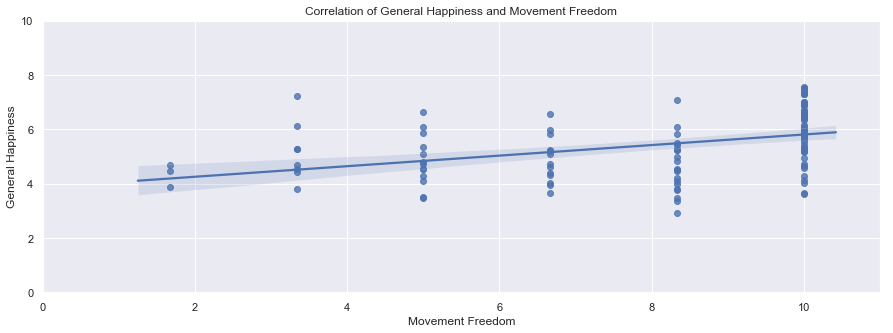

In [93]:
# Happiness and Movement Freedom

# retrieve movement data from Human Freedom Index grouped by country and ordered by movement score

hfi_movement_by_country_data = "SELECT countries, pf_movement FROM 'Human Freedom Index' GROUP BY countries ORDER BY pf_score DESC"
hfi_movement_by_country_raw = pd.read_sql(hfi_movement_by_country_data, con=engine)
hfi_movement_by_country = hfi_movement_by_country_raw.dropna()

# retrieve happiness score data from World Happiness Report groupd by country and ordered by happiness score

whr_happiness_by_country_data = "SELECT Country as countries, `Happiness.Score` as hp_score FROM 'World Happiness Report' GROUP BY countries ORDER BY hp_score DESC"
whr_happiness_by_country_raw = pd.read_sql(whr_happiness_by_country_data, con=engine)
whr_happiness_by_country = whr_happiness_by_country_raw.dropna()

# coombine the two dataframes grouping by county and dropping null values

hfi_movement_whr_happiness_by_country_combined = pd.concat([hfi_movement_by_country, whr_happiness_by_country], sort=True)
hfi_movement_whr_happiness_by_country_grouped = hfi_movement_whr_happiness_by_country_combined.groupby("countries")["pf_movement", "hp_score"].mean()
hfi_movement_whr_happiness_by_country = hfi_movement_whr_happiness_by_country_grouped.dropna()
hfi_movement_whr_happiness_by_country.head(3)

# scatter plot analysis with linear regression

fig, ax = plt.subplots(figsize=(15, 5))
sns.regplot(x="pf_movement", y="hp_score", data=hfi_movement_whr_happiness_by_country)
ax.set_title("Correlation of General Happiness and Movement Freedom")
ax.set_xlabel("Movement Freedom")
ax.set_xlim([0,11])
ax.set_ylabel("General Happiness")
ax.set_ylim([0,10])


,countries,hf_score,ef_score,pf_score,pf_movement_women
0,Norway,8.592142,7.63,9.554284,10.0
1,Sweden,8.452347,7.40,9.504694,10.0
2,Finland,8.653871,7.81,9.497741,10.0


C:\Users\jerem\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Correlation of General Freedom and Economic Freedom')

Text(0.5,0,'General Freedom')

(0, 10)

Text(0,0.5,'Economic Freedom')

(0, 10)

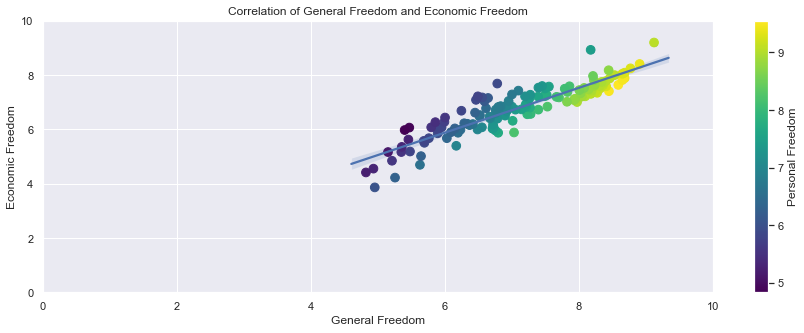

In [94]:
# Human Freedom and Economic Freedom

# colored by human freedom quartile (higher being lower value quartile)
# hfi.plot(kind="scatter", x="hf_score", y="ef_score", c="hf_quartile", cmap="viridis")

# retrieve movement data from Human Freedom Index grouped by country and ordered by movement score

hfi_freedom_and_economy_data = "SELECT countries, hf_score, ef_score, pf_score, pf_movement_women FROM 'Human Freedom Index' GROUP BY countries ORDER BY pf_score DESC"
hfi_freedom_and_economy_raw = pd.read_sql(hfi_freedom_and_economy_data, con=engine)
hfi_freedom_and_economy = hfi_freedom_and_economy_raw.dropna()

hfi_freedom_and_economy.head(3)

# scatter plot analysis with linear regression

fig, ax = plt.subplots(figsize=(15, 5))
sns.regplot(x="hf_score", y="ef_score", data=hfi_freedom_and_economy)
points = plt.scatter(hfi_freedom_and_economy["hf_score"], hfi_freedom_and_economy["ef_score"], c=hfi_freedom_and_economy["pf_score"], s=75, cmap="viridis")
cbar = plt.colorbar(points)
cbar.set_label("Personal Freedom")
ax.set_title("Correlation of General Freedom and Economic Freedom")
ax.set_xlabel("General Freedom")
ax.set_xlim([0,10])
ax.set_ylabel("Economic Freedom")
ax.set_ylim([0,10])

C:\Users\jerem\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Correlation of General Freedom and Economic Freedom')

Text(0.5,0,'General Freedom')

(0, 10)

Text(0,0.5,'Economic Freedom')

(0, 10)

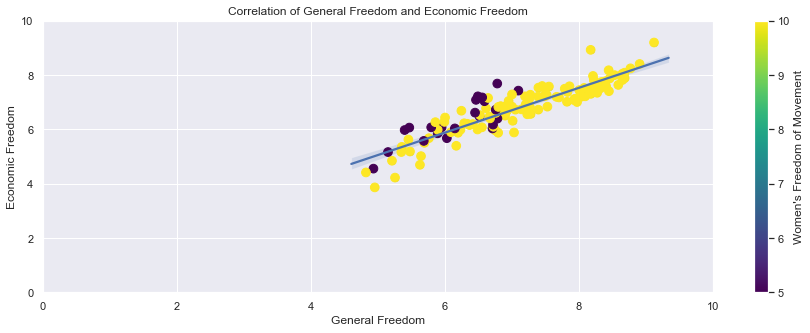

In [95]:
# examination as above but colored by women's personal freedome of movement (similar correlation)

fig, ax = plt.subplots(figsize=(15, 5))
sns.regplot(x="hf_score", y="ef_score", data=hfi_freedom_and_economy)
points = plt.scatter(hfi_freedom_and_economy["hf_score"], hfi_freedom_and_economy["ef_score"], c=hfi_freedom_and_economy["pf_movement_women"], s=75, cmap="viridis")
cbar = plt.colorbar(points)
cbar.set_label("Women's Freedom of Movement")
ax.set_title("Correlation of General Freedom and Economic Freedom")
ax.set_xlabel("General Freedom")
ax.set_xlim([0,10])
ax.set_ylabel("Economic Freedom")
ax.set_ylim([0,10])

hf_score                                                            \
             count     mean std      min      25%      50%      75%      max   
countries                                                                      
Albania        1.0  7.56814 NaN  7.56814  7.56814  7.56814  7.56814  7.56814   

          pf_movement           ...                      pf_movement_women  \
                count      mean ...        75%       max             count   
countries                       ...                                          
Albania           1.0  6.666667 ...   6.666667  6.666667               1.0   

                                             
          mean std  min  25%  50%  75%  max  
countries                                    
Albania    5.0 NaN  5.0  5.0  5.0  5.0  5.0  

[1 rows x 24 columns]

countries
Albania    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

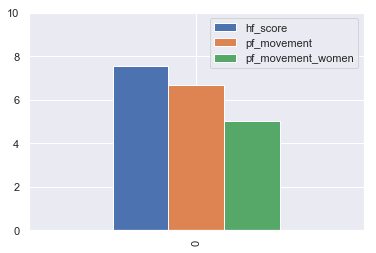

In [67]:
# bar chart of movement and overall freedom scores for Albania

albania = hfi.head(1).groupby("countries")["hf_score", "pf_movement", "pf_movement_women"]

albania.describe()

albania.plot(kind="bar", xlim=(0,10), ylim=(0,10))

,countries,hf_score,hp_score
0,Albania,7.522911,4.644
1,Algeria,5.140803,5.872
2,Angola,5.499577,3.795


C:\Users\jerem\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Correlation of General Freedom and Happiness in non Land Locked Countries')

Text(0.5,0,'Freedom')

(0, 10)

Text(0,0.5,'Happiness')

(0, 10)

,countries,hf_score,hp_score
4,Armenia,7.413269,4.376
6,Austria,8.424141,7.006
7,Azerbaijan,6.153984,5.234


Text(0.5,1,'Correlation of General Freedom and Happiness in Land Locked Countries')

Text(0.5,0,'Freedom')

(0, 10)

Text(0,0.5,'Happiness')

(0, 10)

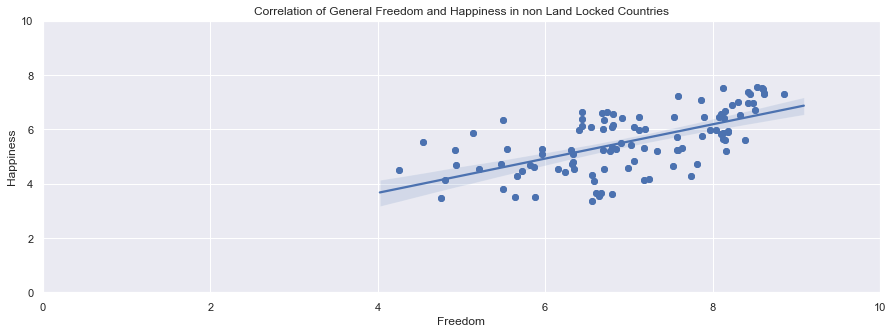

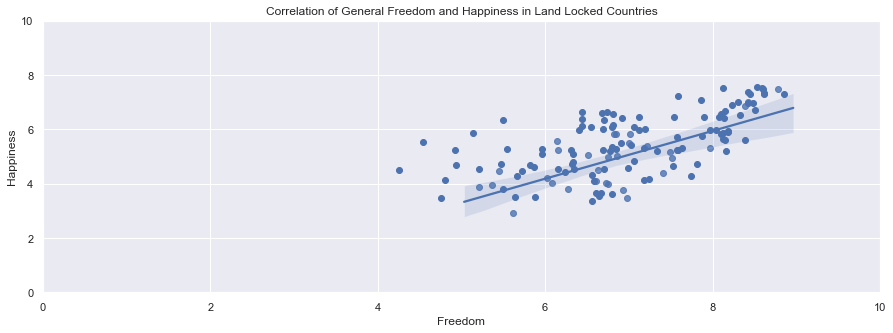

In [96]:
# get list of land locked countries

land_locked_countries = pd.Series(["Afghanistan", "Andorra", "Armenia", "Artsakh", "Austria", "Azerbaijan", "Belarus", "Bhutan", "Bolivia", "Botswana", "Burkina Faso", "Burundi", "Central African Republic", "Chad", "Czech Republic", "Ethiopia", "Hungary","Kazakhstan", "Kosovo", "Kyrgyzstan", "Laos", "Lesotho", "Liechtenstein", "Luxembourg", "Macedonia", "Malawi", "Mali", "Moldova", "Mongolia", "Nepal", "Niger", "Paraguay", "Rwanda", "San Marino" , "Serbia", "Slovakia", "South Ossetia", "South Sudan", "Swaziland", "Switzerland","Tajikistan", "Transnistria", "Turkmenistan", "Uganda", "Uzbekistan","Vatican City", "West Bank", "Zambia", "Zimbabwe"])

# list non land locked countries

hf_wf_scores_ni = hf_wh_scores.reset_index()

nll_freedom = hf_wf_scores_ni.loc[~hf_wf_scores_ni["countries"].isin(land_locked_countries)]

nll_freedom.head(3)

fig, ax = plt.subplots(figsize=(15, 5))
sns.regplot(x="hf_score", y="hp_score", data=nll_freedom)
points = plt.scatter(nll_freedom["hf_score"], nll_freedom["hp_score"])
ax.set_title("Correlation of General Freedom and Happiness in non Land Locked Countries")
ax.set_xlabel("Freedom")
ax.set_xlim([0,10])
ax.set_ylabel("Happiness")
ax.set_ylim([0,10])

llc_Freedom_happiness = hf_wf_scores_ni.loc[hf_wf_scores_ni["countries"].isin(land_locked_countries)]

llc_Freedom_happiness.head(3)

fig, ax = plt.subplots(figsize=(15, 5))
sns.regplot(x="hf_score", y="hp_score", data=llc_Freedom_happiness)
points = plt.scatter(nll_freedom["hf_score"], nll_freedom["hp_score"])
ax.set_title("Correlation of General Freedom and Happiness in Land Locked Countries")
ax.set_xlabel("Freedom")
ax.set_xlim([0,10])
ax.set_ylabel("Happiness")
ax.set_ylim([0,10])